In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.



In [4]:
x_train = x_train[..., tf.newaxis] #adds a additional axis (60000,28,28) --> (60000,28,28,1)
x_test = x_test[..., tf.newaxis]
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
tf.random.normal(shape=x_train.shape)

<tf.Tensor: shape=(60000, 28, 28, 1), dtype=float32, numpy=
array([[[[-0.46804747],
         [ 0.02434904],
         [ 0.5597586 ],
         ...,
         [ 0.19175977],
         [ 0.11121412],
         [-0.5106652 ]],

        [[ 0.18492347],
         [ 0.8151804 ],
         [ 0.36096543],
         ...,
         [ 0.5223539 ],
         [ 0.2482025 ],
         [ 0.1625012 ]],

        [[ 1.0849489 ],
         [-0.23058304],
         [ 2.497338  ],
         ...,
         [ 0.13710502],
         [-0.9607226 ],
         [-0.51631796]],

        ...,

        [[-0.59489363],
         [ 0.0844078 ],
         [ 1.7249873 ],
         ...,
         [-0.43333688],
         [-1.1623993 ],
         [ 0.27028212]],

        [[ 0.45109797],
         [ 1.4027494 ],
         [ 1.4557285 ],
         ...,
         [-0.7943309 ],
         [-0.34346202],
         [-1.2735996 ]],

        [[ 1.0481181 ],
         [ 1.6099782 ],
         [-0.8050628 ],
         ...,
         [-0.29012942],
         [-0.434

In [46]:
noise_factor = 0.01
x_train_noisy = x_train  +  noise_factor * tf.random.normal(shape=x_train.shape)
# noise factor multiplication result in increased spread in noise distribution
# result in 0.2^2 increase of variance, mean doesn't chnage (mean = 0)
x_test_noisy = x_test  +  noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

In [47]:
x_test_noisy.shape

TensorShape([10000, 28, 28, 1])

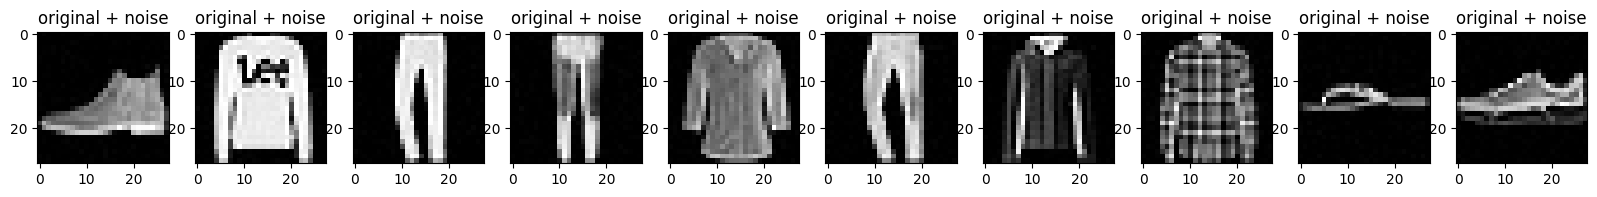

In [48]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [49]:
class Denoise(Model):
    def __init__(self):
        super(Denoise, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Input(shape=(28, 28, 1)),
          layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
          layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

        self.decoder = tf.keras.Sequential([
          layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [50]:
autoencoder = Denoise()

In [51]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [52]:
history=autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 38ms/step - loss: 0.0290 - val_loss: 0.0050
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - loss: 0.0044 - val_loss: 0.0034
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 90s 43ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 12

In [53]:
autoencoder.encoder.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 14, 14, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 7, 7, 8)             │           1,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,320 (5.16 KB)

 Trainable params: 1,320 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
autoencoder.decoder.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_transpose_6 (Conv2DTranspose) │ (32, 14, 14, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_7 (Conv2DTranspose) │ (32, 28, 28, 16)            │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (32, 28, 28, 1)             │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,897 (7.41 KB)

 Trainable params: 1,897 (7.41 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

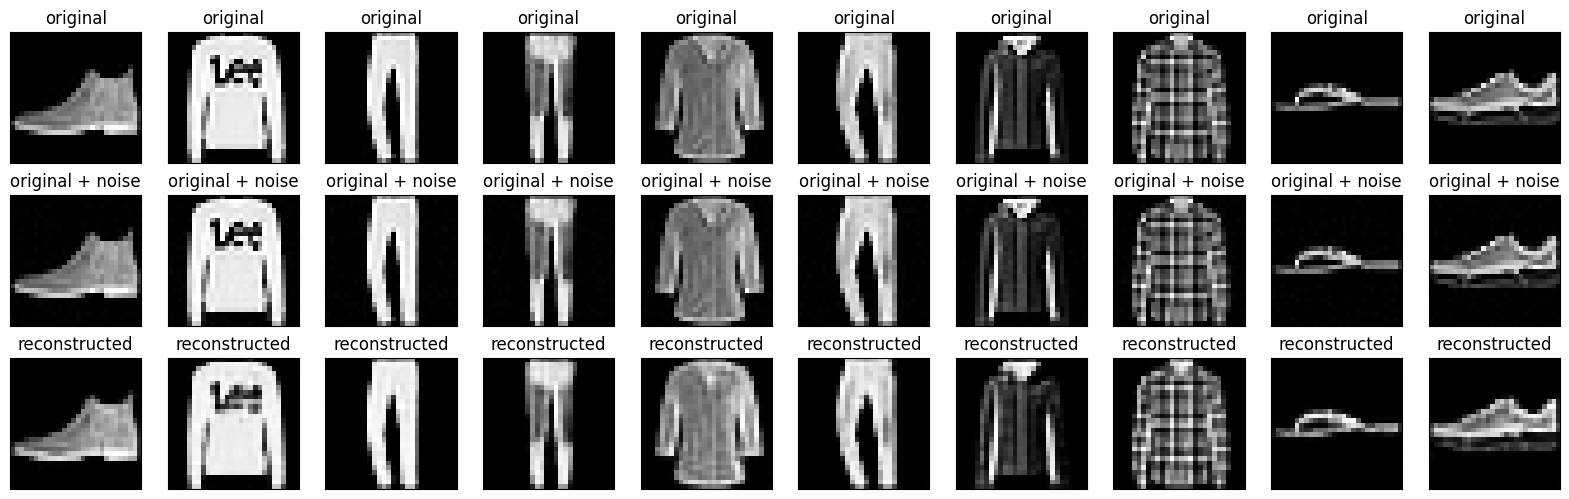

In [56]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display original + noise
    ax = plt.subplot(3, n, i + n + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(3, n, i + 2*n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

In [57]:
test_loss = autoencoder.evaluate(x_test, x_test, verbose=0)
print(f'Test Loss (MSE): {test_loss}')


Test Loss (MSE): 0.0018285837722942233


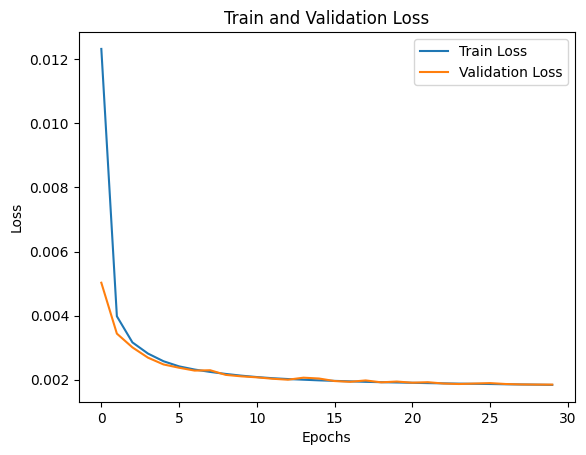

In [58]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
